In [2]:
#Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='muted')

In [4]:
#Load dataset
df= pd.read_csv("mental_health_productivity_dataset.csv")

In [5]:
#Overview
df.shape

(510, 33)

In [6]:
df.dtypes

Employee_ID                      int64
Age                              int64
Gender                          object
Country                         object
Education_Level                 object
Marital_Status                  object
Employment_Type                 object
Industry                        object
Department                      object
Role_Level                      object
Years_Experience                object
Company_Size                    object
Remote_Work                     object
Average_Work_Hours               int64
Has_Mental_Health_Issue        float64
Treatment_Sought               float64
Stress_Level                   float64
Work_Interfere                  object
Company_Support                float64
Mental_Health_Benefits          object
Ease_of_Talking_About_Issue    float64
Mental_Health_Days             float64
Self_Reported_Productivity     float64
Burnout_Symptoms               float64
Sleep_Hours                    float64
Exercise_Frequency       

In [7]:
df.head(15)

,Employee_ID,Age,Gender,Country,Education_Level,Marital_Status,Employment_Type,Industry,Department,Role_Level,Years_Experience,Company_Size,Remote_Work,Average_Work_Hours,Has_Mental_Health_Issue,Treatment_Sought,Stress_Level,Work_Interfere,Company_Support,Mental_Health_Benefits,Ease_of_Talking_About_Issue,Mental_Health_Days,Self_Reported_Productivity,Burnout_Symptoms,Sleep_Hours,Exercise_Frequency,Job_Satisfaction,Work_Life_Balance,Absenteeism_Rate,Manager_Support_Level,Peer_Support_Level,Work_Environment_Score,Has_Therapy_Access
0,1,56,male,Canada,PhD,Married,Part-time,finance,Marketing,Senior,29.7,6–25,1,42,0.0,1.0,NaN,Rarely,1.0,yes,4.0,10.0,1.0,1.0,6.7,1–2 days,1.0,NaN,4.66,4.0,3.0,NaN,1
1,2,54,FEMALE,germany,bachelor,Married,Full-time,Healthcare,engineering,Junior,unknown,100–500,no,69,0.0,0.0,8.0,NaN,4.0,NaN,1.0,6.0,3.0,9.0,6.0,3–5 days,4.0,1.0,16.85,3.0,NaN,5.0,0
2,3,31,Female,Australia,masters,Divorced,Part-time,finance,Support,Manager,12.5,26–100,1,66,NaN,1.0,4.0,Never,2.0,0,1.0,7.0,5.0,4.0,3.1,never,4.0,5.0,NaN,4.0,NaN,5.0,1
3,4,50,FEMALE,USA,bachelor,Single,Part-time,tech,Sales,Junior,21.5,26–100,0,54,NaN,1.0,9.0,OFTEN,2.0,0,1.0,11.0,2.0,5.0,4.4,3–5 days,3.0,4.0,13.91,4.0,3.0,2.0,yes
4,5,24,f,germany,High School,Other,contract,Healthcare,engineering,Manager,3.9,6–25,0,47,0.0,1.0,4.0,NaN,1.0,0,NaN,4.0,8.0,1.0,5.5,Never,1.0,3.0,9.70,2.0,2.0,1.0,0
5,6,41,Female,Germany,High School,SINGLE,contract,Healthcare,Marketing,Junior,11.7,500+,0,36,1.0,0.0,4.0,NaN,NaN,0,1.0,8.0,NaN,3.0,7.7,never,2.0,5.0,7.36,4.0,3.0,1.0,NaN
6,7,23,Female,germany,PhD,Other,Contract,Manufacturing,Marketing,Mid,3.2,100–500,0,22,0.0,NaN,5.0,Never,3.0,NaN,4.0,12.0,3.0,7.0,7.9,never,1.0,NaN,10.33,NaN,NaN,4.0,NaN
7,8,26,FEMALE,ind,masters,Married,Internship,Manufacturing,Engineering,Senior,unknown,500+,1,52,1.0,1.0,8.0,Never,4.0,0,NaN,NaN,4.0,4.0,6.4,3–5 days,NaN,1.0,0.36,1.0,3.0,5.0,1
8,9,50,f,germany,High School,Other,Part-time,finance,hr,Executive,20.5,100-500,1,57,1.0,1.0,6.0,NaN,4.0,1,2.0,12.0,4.0,1.0,7.5,never,NaN,NaN,18.30,1.0,NaN,3.0,yes
9,10,52,male,germany,masters,Single,Internship,finance,HR,Junior,10.7,100-500,0,22,1.0,1.0,7.0,NaN,1.0,1,NaN,2.0,6.0,10.0,8.2,3–5 days,4.0,2.0,5.87,5.0,5.0,NaN,1


In [8]:
df.columns

Index(['Employee_ID', 'Age', 'Gender', 'Country', 'Education_Level',
       'Marital_Status', 'Employment_Type', 'Industry', 'Department',
       'Role_Level', 'Years_Experience', 'Company_Size', 'Remote_Work',
       'Average_Work_Hours', 'Has_Mental_Health_Issue', 'Treatment_Sought',
       'Stress_Level', 'Work_Interfere', 'Company_Support',
       'Mental_Health_Benefits', 'Ease_of_Talking_About_Issue',
       'Mental_Health_Days', 'Self_Reported_Productivity', 'Burnout_Symptoms',
       'Sleep_Hours', 'Exercise_Frequency', 'Job_Satisfaction',
       'Work_Life_Balance', 'Absenteeism_Rate', 'Manager_Support_Level',
       'Peer_Support_Level', 'Work_Environment_Score', 'Has_Therapy_Access'],
      dtype='object')

Data Cleaning

Drop unneccessary columns

In [10]:
df.drop(columns=['Employee_ID', 'Country', 'Role_Level', 'Industry', 'Company_Size'],inplace=True)

Handling missing values

In [11]:
# Check percentage of missing values
missing = df.isnull().mean() * 100
print(missing[missing > 0].sort_values(ascending=False))

Work_Interfere                 20.588235
Has_Therapy_Access             12.156863
Job_Satisfaction               11.960784
Absenteeism_Rate               11.764706
Sleep_Hours                    10.980392
Treatment_Sought               10.784314
Stress_Level                   10.784314
Ease_of_Talking_About_Issue    10.588235
Mental_Health_Benefits         10.392157
Work_Environment_Score         10.196078
Self_Reported_Productivity      9.803922
Burnout_Symptoms                9.019608
Manager_Support_Level           8.823529
Mental_Health_Days              8.823529
Work_Life_Balance               8.431373
Company_Support                 8.431373
Peer_Support_Level              7.254902
Has_Mental_Health_Issue         5.294118
dtype: float64


In [12]:
#removes any columns that have more than 50% missing values
df = df.dropna(thresh=len(df) * 0.5, axis=1)

In [14]:
# Fill missing categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    if not df[col].mode().empty:
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        # If column has no mode (all values missing), fill with a placeholder
        df[col] = df[col].fillna('Unknown')

In [15]:
df[df['Has_Mental_Health_Issue'].isna()]
df.dropna(subset=['Has_Mental_Health_Issue'], inplace=True)

In [16]:
df.shape

(483, 28)

In [17]:
# Fill missing numeric columns with median
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [19]:
df['Gender'].unique()

array(['male', 'FEMALE', 'f', 'Female', 'Other/Prefer not to say', 'M',
       'Male'], dtype=object)

In [20]:
# Example: Gender column
gender_map = {
    'male': 'Male',
    'm': 'Male',
    'man': 'Male',
    'female': 'Female',
    'f': 'Female',
    'woman': 'Female'
}

# Convert to lowercase, strip, then map
df['Gender'] = df['Gender'].astype(str).str.strip().str.lower().map(gender_map)
df['Gender'] = df['Gender'].fillna('Other/Prefer not to say')


In [21]:
df['Work_Interfere'].unique()

array(['Rarely', 'Never', 'Often', 'OFTEN', 'Sometimes'], dtype=object)

In [22]:
# Work_Interfere
interfere_map = {
    'never': 'Never',
    'rarely': 'Rarely',
    'sometimes': 'Sometimes',
    'often': 'Often',
    'don’t know': 'Don’t know',
    'unknown': 'Don’t know'
}

df['Work_Interfere'] = df['Work_Interfere'].astype(str).str.strip().str.lower().map(interfere_map)
df['Work_Interfere'] = df['Work_Interfere'].fillna('Don’t know')

In [23]:
df['Marital_Status'].unique()

array(['Married', 'Other', 'SINGLE', 'Single', 'married', 'Divorced'],
      dtype=object)

In [24]:
# Example: Marital_Status
martial_status_map = {
    'married': 'Married',
    'single': 'Single',
    'divorced': 'Divorced',
    'other': 'Other',
    'don’t know': 'Don’t know',
    'unknown': 'Don’t know'
}

df['Marital_Status'] = df['Marital_Status'].astype(str).str.strip().str.lower().map(martial_status_map)
df['Marital_Status'] = df['Marital_Status'].fillna('Don’t know')

In [25]:
df['Education_Level'].unique()

array(['PhD', 'bachelor', 'High School', 'masters', 'Bachelor', 'Master'],
      dtype=object)

In [26]:
ed_lvl_map = {
    'bachelor': 'Bachelor',
    'masters': 'Master',
    'phd': 'PhD',
    'high school': 'High School',
    'master': 'Master'
}

df['Education_Level'] = df['Education_Level'].astype(str).str.strip().str.lower().map(ed_lvl_map)

In [27]:
df['Employment_Type'].unique()

array(['Part-time', 'Full-time', 'contract', 'Contract', 'Internship',
       'full time'], dtype=object)

In [28]:
emp_typ_map = {
    'part-time': 'Part-time',
    'full-time': 'Full-time',
    'contract': 'Contract',
    'internship': 'Internship',
}

df['Employment_Type'] = df['Employment_Type'].astype(str).str.strip().str.lower().map(emp_typ_map)

In [29]:
df['Employment_Type'].value_counts(dropna=False)

Employment_Type
Contract      166
Full-time      90
Internship     88
NaN            70
Part-time      69
Name: count, dtype: int64

In [30]:
df.dropna(subset=['Employment_Type'], inplace=True)

In [31]:
df['Employment_Type'].unique()

array(['Part-time', 'Full-time', 'Contract', 'Internship'], dtype=object)

In [32]:
df['Exercise_Frequency'].unique()

array(['1–2 days', '3–5 days', 'Never', 'never', '1-2 days', 'Daily'],
      dtype=object)

In [36]:
df['Exercise_Frequency'] = df['Exercise_Frequency'].str.lower()  # lowercase all
df['Exercise_Frequency'] = df['Exercise_Frequency'].replace({
    'never': 'never',
    'daily': 'daily',
    '1–2 days': '1-2 days',  # normalize dash
    '1-2 days': '1-2 days',
    '3–5 days': '3-5 days',  # normalize dash
    '3-5 days': '3-5 days'
})


In [39]:
df['Department'].unique()

array(['Marketing', 'Engineering', 'HR', 'Support', 'Sales'], dtype=object)

In [38]:
df['Department'] = df['Department'].str.lower()  # lowercase all
df['Department'] = df['Department'].replace({
    'marketing': 'Marketing',
    'engineering': 'Engineering',
    'hr': 'HR',
    'support': 'Support',
    'sales': 'Sales',
})

In [40]:
df.isnull().sum() * 100/ len(df)

Age                            0.0
Gender                         0.0
Education_Level                0.0
Marital_Status                 0.0
Employment_Type                0.0
Department                     0.0
Years_Experience               0.0
Remote_Work                    0.0
Average_Work_Hours             0.0
Has_Mental_Health_Issue        0.0
Treatment_Sought               0.0
Stress_Level                   0.0
Work_Interfere                 0.0
Company_Support                0.0
Mental_Health_Benefits         0.0
Ease_of_Talking_About_Issue    0.0
Mental_Health_Days             0.0
Self_Reported_Productivity     0.0
Burnout_Symptoms               0.0
Sleep_Hours                    0.0
Exercise_Frequency             0.0
Job_Satisfaction               0.0
Work_Life_Balance              0.0
Absenteeism_Rate               0.0
Manager_Support_Level          0.0
Peer_Support_Level             0.0
Work_Environment_Score         0.0
Has_Therapy_Access             0.0
dtype: float64

In [41]:
numeric_cols = ['Age', 'Years_Experience', 'Average_Work_Hours', 
                'Stress_Level', 'Self_Reported_Productivity', 'Burnout_Symptoms', 
                'Sleep_Hours', 'Job_Satisfaction', 'Work_Life_Balance', 'Absenteeism_Rate']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # invalid entries become NaN
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

In [42]:
# Find non-numeric values in numeric columns
for col in numeric_cols:
    bad_values = df[col][df[col].apply(lambda x: not str(x).replace('.', '', 1).isdigit())]
    print(f"{col} bad entries:\n", bad_values.unique())

Age bad entries:
 []
Years_Experience bad entries:
 []
Average_Work_Hours bad entries:
 []
Stress_Level bad entries:
 []
Self_Reported_Productivity bad entries:
 []
Burnout_Symptoms bad entries:
 []
Sleep_Hours bad entries:
 []
Job_Satisfaction bad entries:
 []
Work_Life_Balance bad entries:
 []
Absenteeism_Rate bad entries:
 []


In [43]:
df.dtypes

Age                              int64
Gender                          object
Education_Level                 object
Marital_Status                  object
Employment_Type                 object
Department                      object
Years_Experience               float64
Remote_Work                     object
Average_Work_Hours               int64
Has_Mental_Health_Issue        float64
Treatment_Sought               float64
Stress_Level                   float64
Work_Interfere                  object
Company_Support                float64
Mental_Health_Benefits          object
Ease_of_Talking_About_Issue    float64
Mental_Health_Days             float64
Self_Reported_Productivity     float64
Burnout_Symptoms               float64
Sleep_Hours                    float64
Exercise_Frequency              object
Job_Satisfaction               float64
Work_Life_Balance              float64
Absenteeism_Rate               float64
Manager_Support_Level          float64
Peer_Support_Level       

In [44]:
# Categorical columns
cat_cols = ['Gender', 'Education_Level', 'Marital_Status',  
            'Employment_Type', 'Work_Interfere', 'Exercise_Frequency']
df[cat_cols] = df[cat_cols].astype('category')

# Numeric columns
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)


In [45]:
df['Remote_Work'].unique()

array(['1', 'no', '0', 'yes'], dtype=object)

In [46]:
Remote_Work = {
    '1': 'yes',
    '0': 'no'
}

df['Remote_Work'] = df['Remote_Work'].astype(str).str.strip().str.lower().map(Remote_Work)
df['Remote_Work'] = df['Remote_Work'].fillna('unknown')

In [47]:
df.head()

,Age,Gender,Education_Level,Marital_Status,Employment_Type,Department,Years_Experience,Remote_Work,Average_Work_Hours,Has_Mental_Health_Issue,Treatment_Sought,Stress_Level,Work_Interfere,Company_Support,Mental_Health_Benefits,Ease_of_Talking_About_Issue,Mental_Health_Days,Self_Reported_Productivity,Burnout_Symptoms,Sleep_Hours,Exercise_Frequency,Job_Satisfaction,Work_Life_Balance,Absenteeism_Rate,Manager_Support_Level,Peer_Support_Level,Work_Environment_Score,Has_Therapy_Access
0,56,Male,PhD,Married,Part-time,Marketing,29.70,yes,42,0.0,1.0,6.0,Rarely,1.0,yes,4.0,10.0,1.0,1.0,6.7,1-2 days,1.0,3.0,4.66,4.0,3.0,3.0,1
1,54,Female,Bachelor,Married,Full-time,Engineering,11.25,unknown,69,0.0,0.0,8.0,Never,4.0,1,1.0,6.0,3.0,9.0,6.0,3-5 days,4.0,1.0,16.85,3.0,3.0,5.0,0
4,24,Female,High School,Other,Contract,Engineering,3.90,no,47,0.0,1.0,4.0,Never,1.0,0,3.0,4.0,8.0,1.0,5.5,never,1.0,3.0,9.70,2.0,2.0,1.0,0
5,41,Female,High School,Single,Contract,Marketing,11.70,no,36,1.0,0.0,4.0,Never,3.0,0,1.0,8.0,6.0,3.0,7.7,never,2.0,5.0,7.36,4.0,3.0,1.0,1
6,23,Female,PhD,Other,Contract,Marketing,3.20,no,22,0.0,1.0,5.0,Never,3.0,1,4.0,12.0,3.0,7.0,7.9,never,1.0,3.0,10.33,3.0,3.0,4.0,1


In [48]:
df = df.astype({
    'Has_Mental_Health_Issue': 'int',
    'Treatment_Sought': 'int',
    'Mental_Health_Days': 'int',
    'Self_Reported_Productivity': 'int',
    'Company_Support': 'int',
    'Sleep_Hours': 'int'
})

In [49]:
df.isnull().sum() * 100/ len(df)

Age                            0.0
Gender                         0.0
Education_Level                0.0
Marital_Status                 0.0
Employment_Type                0.0
Department                     0.0
Years_Experience               0.0
Remote_Work                    0.0
Average_Work_Hours             0.0
Has_Mental_Health_Issue        0.0
Treatment_Sought               0.0
Stress_Level                   0.0
Work_Interfere                 0.0
Company_Support                0.0
Mental_Health_Benefits         0.0
Ease_of_Talking_About_Issue    0.0
Mental_Health_Days             0.0
Self_Reported_Productivity     0.0
Burnout_Symptoms               0.0
Sleep_Hours                    0.0
Exercise_Frequency             0.0
Job_Satisfaction               0.0
Work_Life_Balance              0.0
Absenteeism_Rate               0.0
Manager_Support_Level          0.0
Peer_Support_Level             0.0
Work_Environment_Score         0.0
Has_Therapy_Access             0.0
dtype: float64

Remove Duplicates & Outliers

In [50]:
# Remove duplicate rows
df = df.drop_duplicates()

# Age outliers
df = df[(df['Age'] >= 18) & (df['Age'] <= 65)]

# Work hours sanity check
df = df[(df['Average_Work_Hours'] >= 20) & (df['Average_Work_Hours'] <= 80)]

Feature Engineering

In [51]:
# Create Age Group
bins = [18, 25, 35, 45, 55, 65]
labels = ['18–25', '26–35', '36–45', '46–55', '56–65']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Work Hours Category
df['Work_Hours_Category'] = pd.cut(df['Average_Work_Hours'],
                                   bins=[0, 39, 49, 60, 80],
                                   labels=['<40', '40–49', '50–60', '60+'])

# Productivity Index (simple derived metric)
df['Productivity_Index'] = (
    (df['Self_Reported_Productivity'] * 0.4) +
    (df['Work_Life_Balance'] * 0.3) +
    (df['Job_Satisfaction'] * 0.3)
).round(2)

Exploratory Data Analysis (EDA)

Summary Statistics

In [52]:
print("\nNumeric Summary:")
print(df.describe())

print("\nCategorical Summary:")
for col in cat_cols:
    print(f"\n{col}:\n", df[col].value_counts())



Numeric Summary:
              Age  Years_Experience  Average_Work_Hours  \
count  325.000000        325.000000          325.000000   
mean    41.735385         12.294000           45.787692   
std     13.375771          9.319866           14.299740   
min     18.000000          0.500000           20.000000   
25%     31.000000          4.700000           34.000000   
50%     42.000000         11.250000           46.000000   
75%     54.000000         16.800000           58.000000   
max     64.000000         42.800000           69.000000   

       Has_Mental_Health_Issue  Treatment_Sought  Stress_Level  \
count               325.000000        325.000000    325.000000   
mean                  0.498462          0.563077      5.587692   
std                   0.500769          0.496770      2.765947   
min                   0.000000          0.000000      1.000000   
25%                   0.000000          0.000000      3.000000   
50%                   0.000000          1.000000      

In [53]:
df.shape

(325, 31)

Gender Distribution

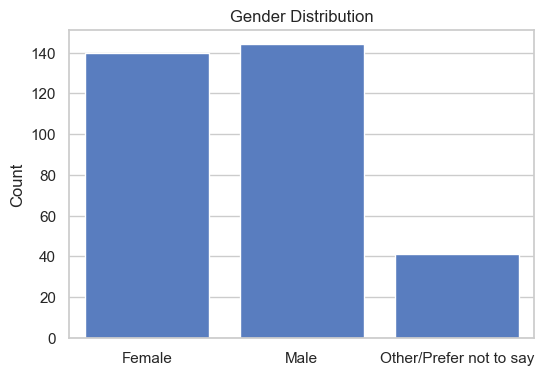

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

Stress Level Distribution

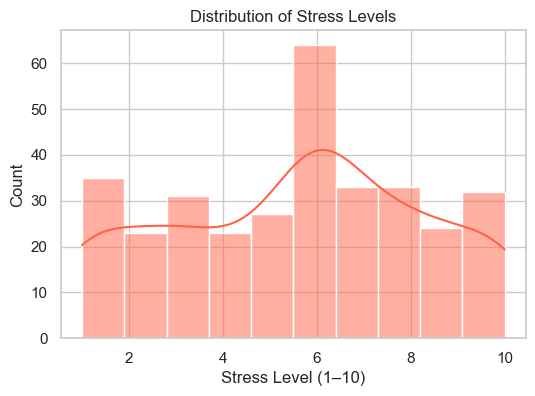

In [55]:
plt.figure(figsize=(6,4))
sns.histplot(df['Stress_Level'], bins=10, kde=True, color='tomato')
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Level (1–10)')
plt.ylabel('Count')
plt.show()

Stress vs Productivity

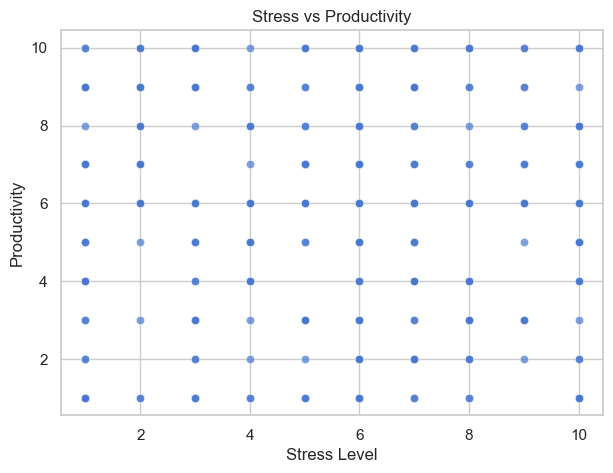

In [56]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Stress_Level', y='Self_Reported_Productivity', alpha=0.7)
plt.title('Stress vs Productivity')
plt.xlabel('Stress Level')
plt.ylabel('Productivity')
plt.show()

Average Stress by Department

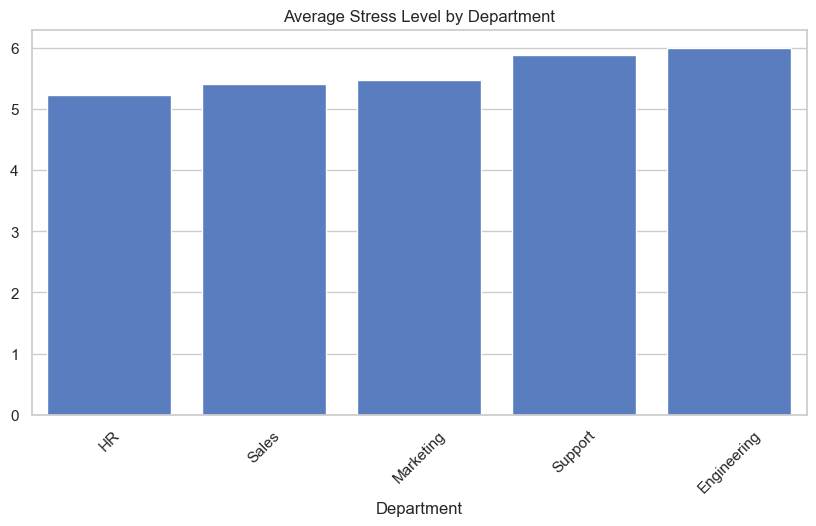

In [58]:
plt.figure(figsize=(10,5))
dept_stress = df.groupby('Department')['Stress_Level'].mean().sort_values()
sns.barplot(x=dept_stress.index, y=dept_stress.values)
plt.title('Average Stress Level by Department')
plt.xticks(rotation=45)
plt.show()

Treatment Sought by Gender

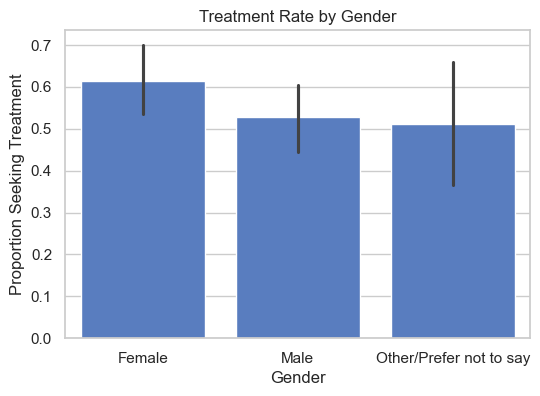

In [59]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Gender', y='Treatment_Sought', estimator=np.mean)
plt.title('Treatment Rate by Gender')
plt.ylabel('Proportion Seeking Treatment')
plt.show()


Work-Life Balance vs Remote Work

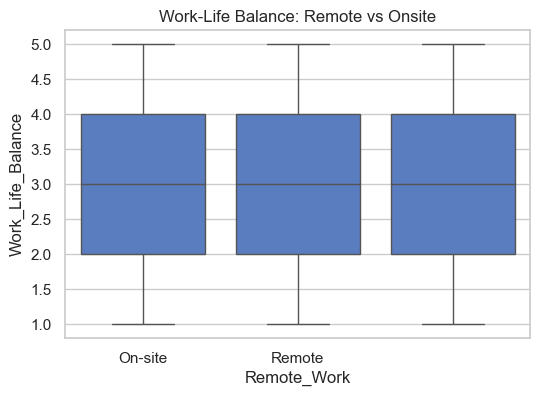

In [60]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Remote_Work', y='Work_Life_Balance')
plt.title('Work-Life Balance: Remote vs Onsite')
plt.xticks([0, 1], ['On-site', 'Remote'])
plt.show()

Correlation Heatmap

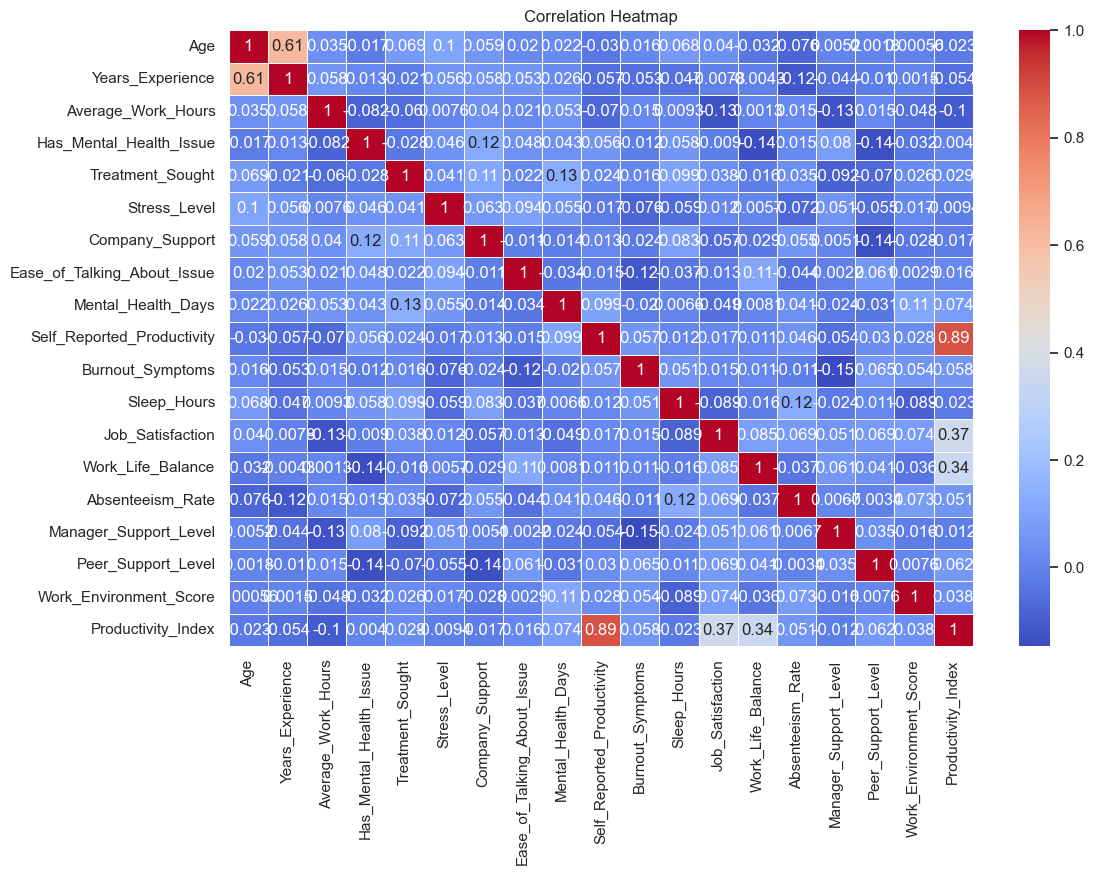

In [62]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

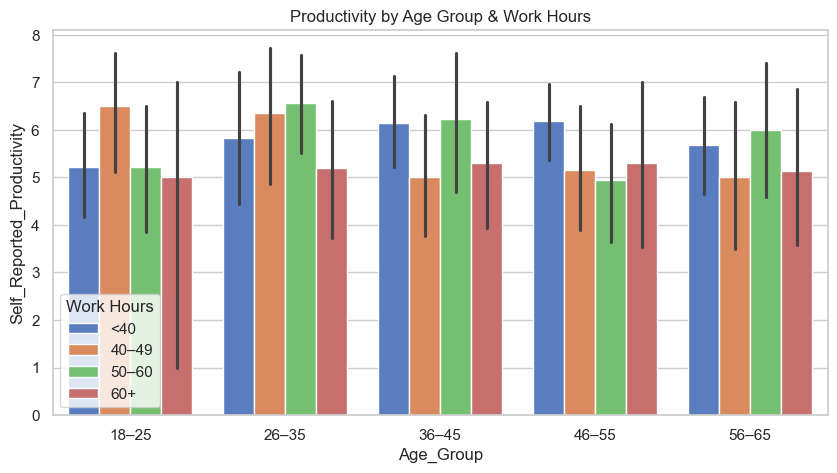

In [63]:
#Average Productivity by Age Group & Work Hours
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Age_Group', y='Self_Reported_Productivity', hue='Work_Hours_Category')
plt.title('Productivity by Age Group & Work Hours')
plt.legend(title='Work Hours')
plt.show()

In [64]:
df.to_csv("cleaned_mental_health_productivity.csv", index=False)
print("✅ Cleaned dataset exported successfully.")

✅ Cleaned dataset exported successfully.
